In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing Dataset
from google.colab import files
uploaded=files.upload()

Saving Electric Vehicle Sales by State in India.csv to Electric Vehicle Sales by State in India.csv


In [3]:
#reading the data set
df=pd.read_csv('Electric Vehicle Sales by State in India.csv')

In [4]:
df.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


In [5]:
#Checking if there is any null values
print(df.isnull().sum())

Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64


In [6]:
#describing the table

In [7]:
df.describe()


,Year,EV_Sales_Quantity
count,96845.000000,96845.000000
mean,2018.622768,37.108896
std,2.895581,431.566675
min,2014.000000,0.000000
25%,2016.000000,0.000000
50%,2019.000000,0.000000
75%,2021.000000,0.000000
max,2024.000000,20584.000000


In [8]:
# visualization of the data to understand the data

In [9]:
# Top 10 State in india by total EV sales

<ipython-input-10-96af9625b034>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_sales.values, y=state_sales.index, palette='viridis')


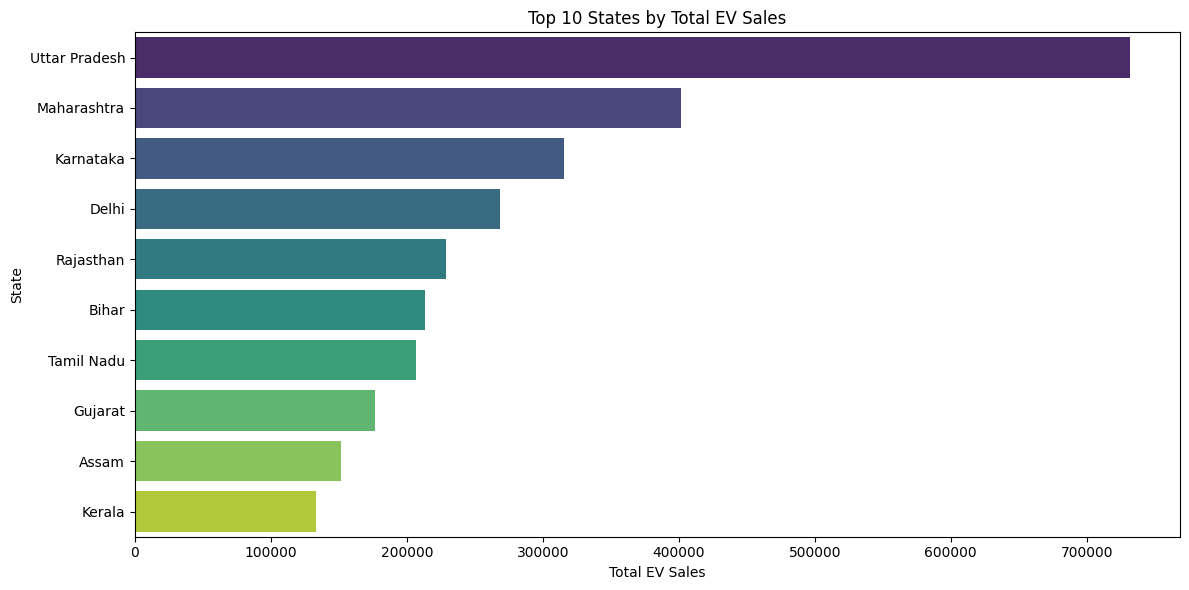

In [10]:
state_sales = df.groupby('State')['EV_Sales_Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=state_sales.values, y=state_sales.index, palette='viridis')
plt.title('Top 10 States by Total EV Sales')
plt.xlabel('Total EV Sales')
plt.ylabel('State')
plt.tight_layout()
plt.show()

In [11]:
# Monthly Ev sale in india

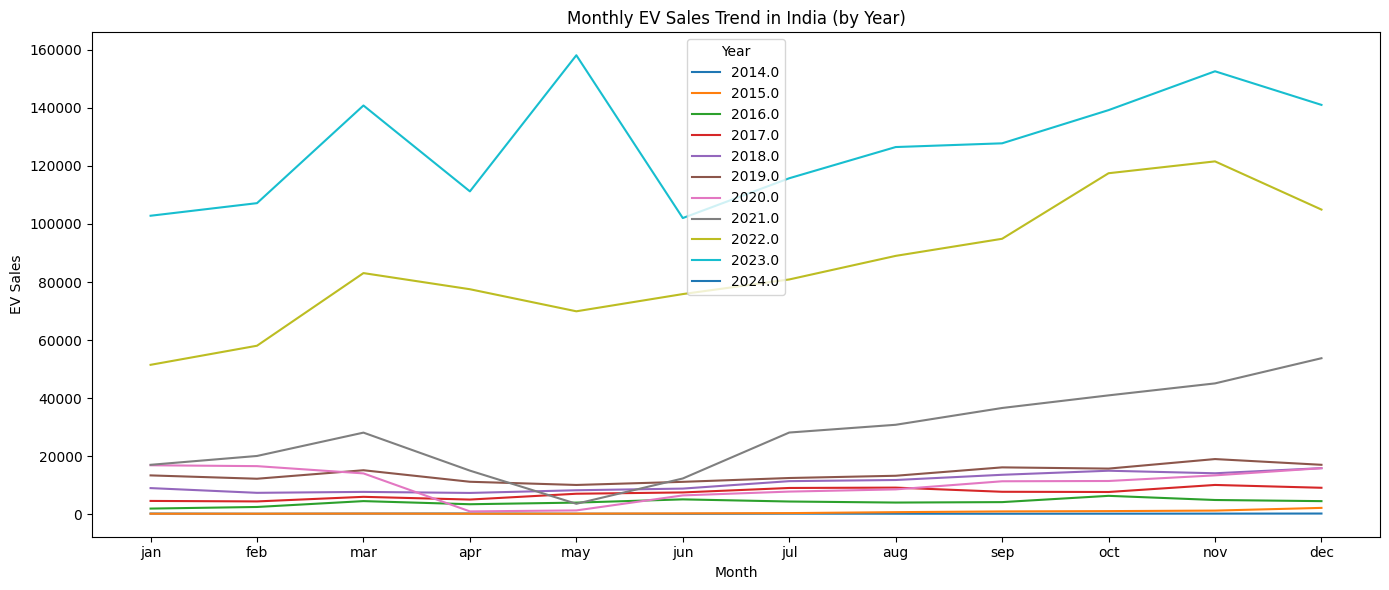

In [12]:
monthly_sales = df.groupby(['Year', 'Month_Name'])['EV_Sales_Quantity'].sum().reset_index()


month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
monthly_sales['Month_Name'] = pd.Categorical(monthly_sales['Month_Name'].str.lower(), categories=month_order, ordered=True)

plt.figure(figsize=(14,6))
sns.lineplot(data=monthly_sales.sort_values(['Year', 'Month_Name']),
             x='Month_Name', y='EV_Sales_Quantity', hue='Year', palette='tab10')
plt.title('Monthly EV Sales Trend in India (by Year)')
plt.ylabel('EV Sales')
plt.xlabel('Month')
plt.legend(title='Year')
plt.tight_layout()
plt.show()

In [13]:
# EV sales by type of the vehicle

<ipython-input-14-9b5abe80739a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vehicle_type_sales.index, y=vehicle_type_sales.values, palette='coolwarm')


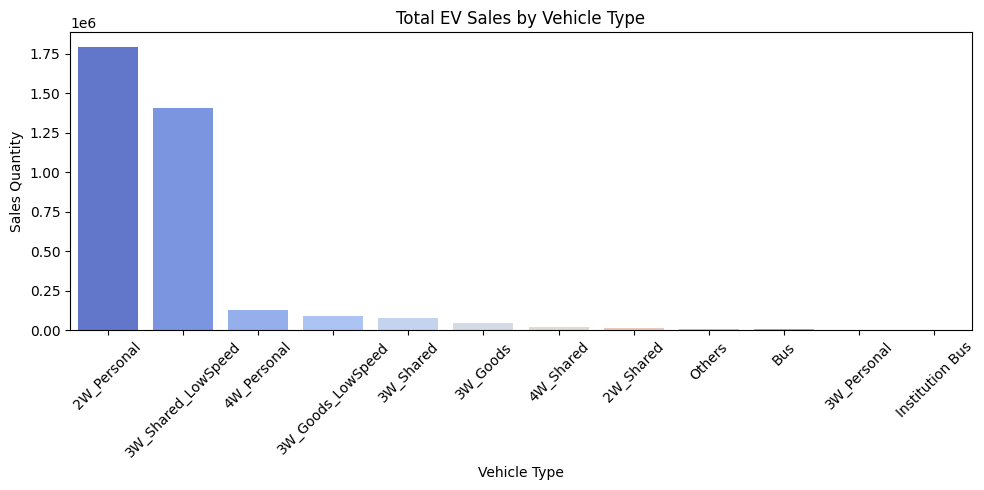

In [14]:
vehicle_type_sales = df.groupby('Vehicle_Type')['EV_Sales_Quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=vehicle_type_sales.index, y=vehicle_type_sales.values, palette='coolwarm')
plt.title('Total EV Sales by Vehicle Type')
plt.ylabel('Sales Quantity')
plt.xlabel('Vehicle Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
## HEAT MAP OF SALES BY STATE ##
# This heatmap visualizes how EV sales are distributed across different Indian states over the years.
# Each cell in the grid shows the total number of EVs sold in a particular state for a given year.
# Darker shades indicate higher EV sales.

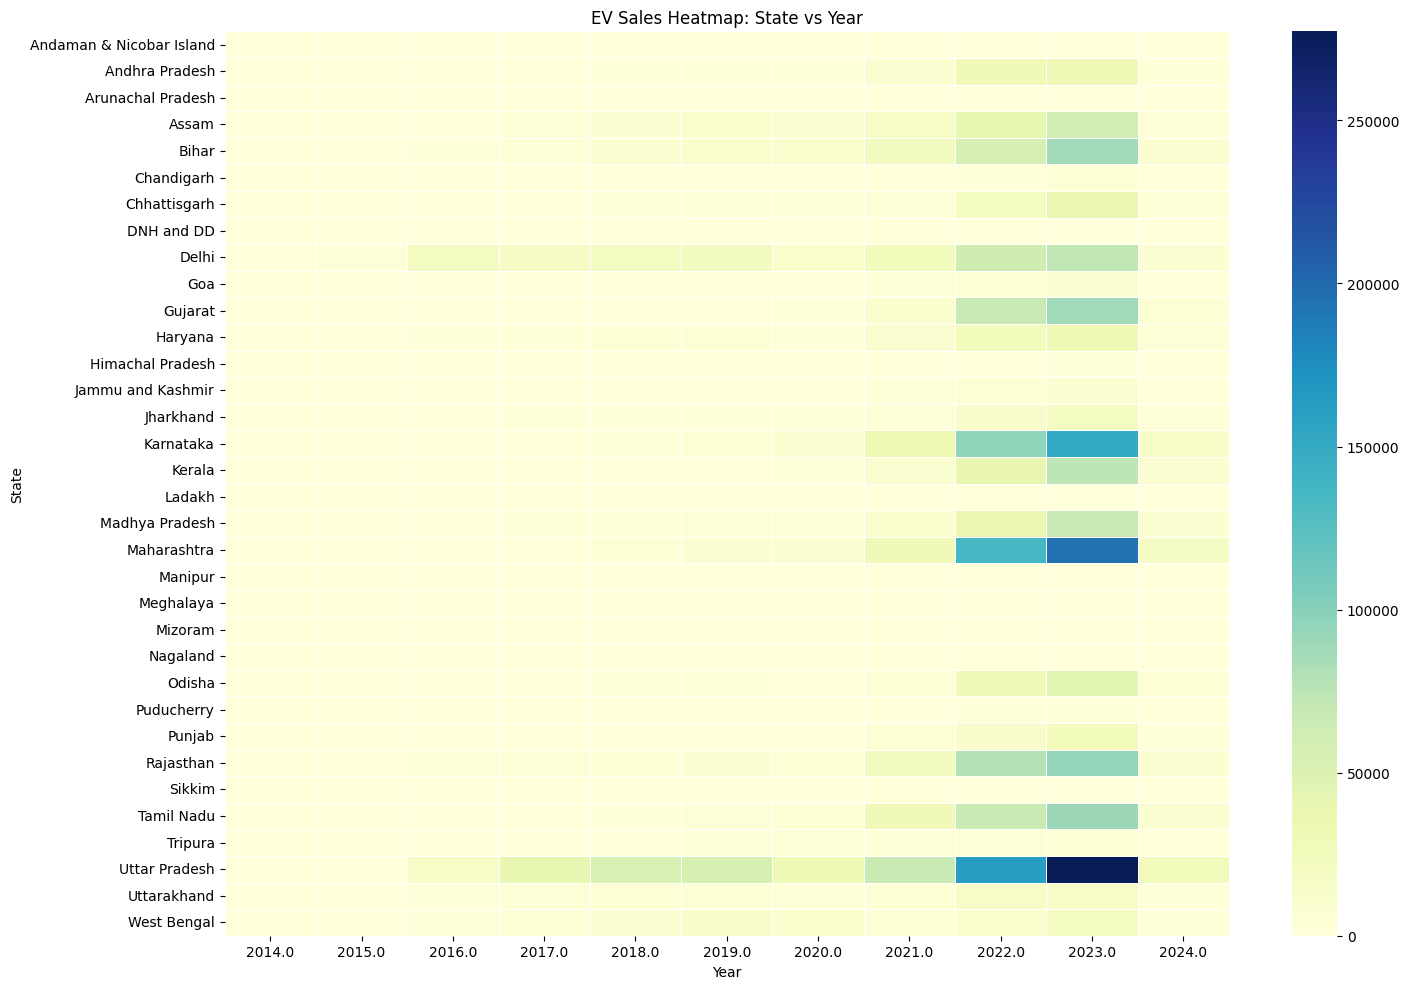

In [16]:
heatmap_data = df.groupby(['State', 'Year'])['EV_Sales_Quantity'].sum().unstack().fillna(0)

plt.figure(figsize=(15,10))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=0.5)
plt.title('EV Sales Heatmap: State vs Year')
plt.xlabel('Year')
plt.ylabel('State')
plt.tight_layout()
plt.show()

In [17]:
# Sales by vehicle category over year

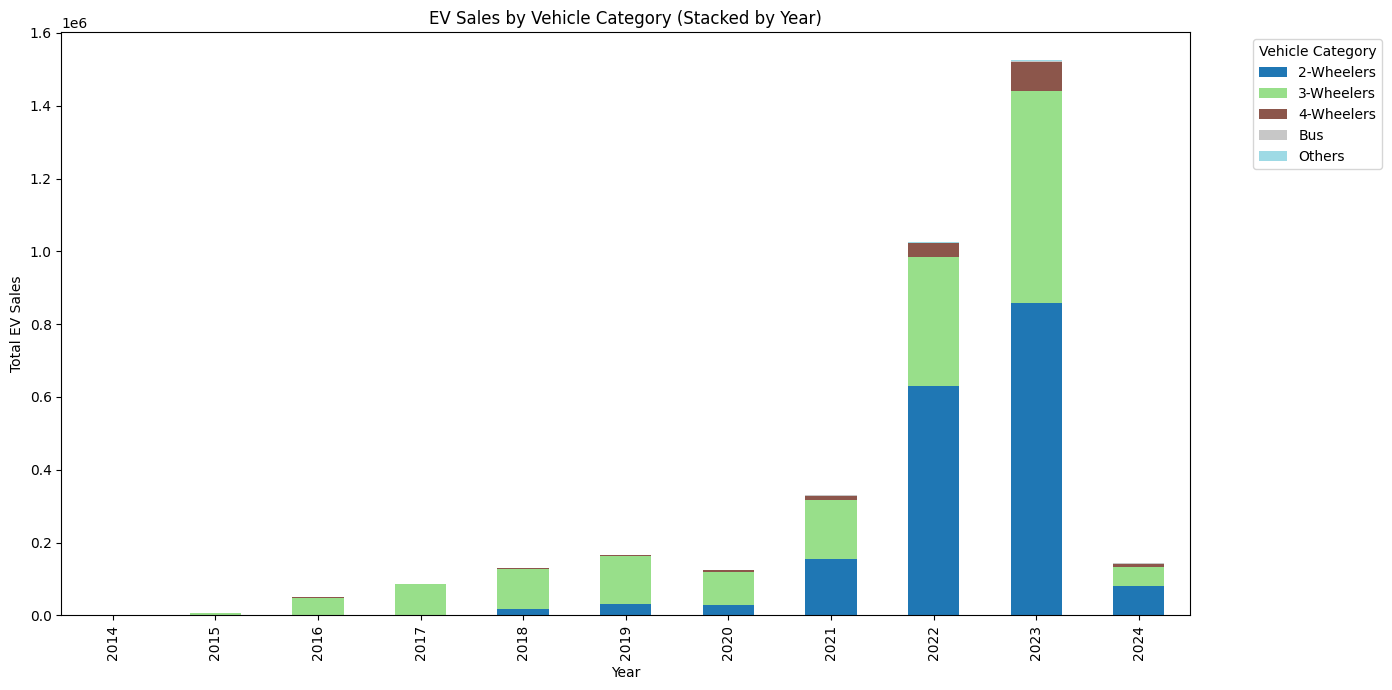

In [18]:
df['Vehicle_Category'] = df['Vehicle_Category'].astype(str).str.strip().str.title()
df['Year'] = df['Year'].astype(int)  # Make sure Year is integer

# Group and pivot the data
stacked_data = df.groupby(['Year', 'Vehicle_Category'])['EV_Sales_Quantity'].sum().unstack(fill_value=0)

# Plot stacked bar chart
stacked_data.plot(kind='bar', stacked=True, figsize=(14,7), colormap='tab20')
plt.title('EV Sales by Vehicle Category (Stacked by Year)')
plt.xlabel('Year')
plt.ylabel('Total EV Sales')
plt.legend(title='Vehicle Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [19]:
# Early Sales of EV vehicle

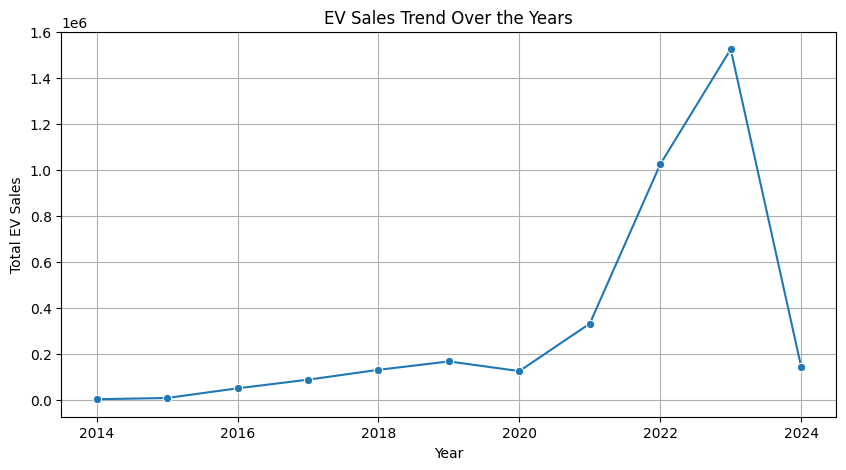

In [20]:
yearly_sales = df.groupby('Year')['EV_Sales_Quantity'].sum()

plt.figure(figsize=(10,5))
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values, marker='o')
plt.title('EV Sales Trend Over the Years')
plt.xlabel('Year')
plt.ylabel('Total EV Sales')
plt.grid(True)
plt.show()

In [21]:
# PREDICTING THE SALES IN FUTURE FROM YEAR 2025-2030

In [22]:
# Convert to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [23]:
# Aggregate total monthly sales
monthly_sales = df.groupby(['Date']).agg({'EV_Sales_Quantity': 'sum'}).reset_index()
monthly_sales_ts = monthly_sales.set_index('Date').resample('M').sum()
monthly_sales_ts = monthly_sales_ts[monthly_sales_ts['EV_Sales_Quantity'] > 0]

#State-level monthly aggregation
state_monthly_sales = df.groupby(['Date', 'State']).agg({'EV_Sales_Quantity': 'sum'}).reset_index()

<ipython-input-23-3a8434dfc16f>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales_ts = monthly_sales.set_index('Date').resample('M').sum()


In [24]:
from statsmodels.tsa.arima.model import ARIMA

In [25]:
# Fit ARIMA model
arima_model = ARIMA(monthly_sales_ts['EV_Sales_Quantity'], order=(1, 1, 1))
arima_result = arima_model.fit()

# Forecast next 60 months
forecast_5y_arima = arima_result.forecast(steps=60)

# Combine forecast with original data
full_forecast = pd.concat([monthly_sales_ts['EV_Sales_Quantity'], forecast_5y_arima])
full_forecast.index = pd.date_range(start=monthly_sales_ts.index[0], periods=len(full_forecast), freq='M')

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
<ipython-input-25-5dfbc0491205>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  full_forecast.index = pd.date_range(start=monthly_sales_ts.index[0], periods=len(full_forecast), freq='M')


<ipython-input-26-ddeea1fbaa19>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_5y_arima.index = pd.date_range(start='2025-01-01', periods=60, freq='M')


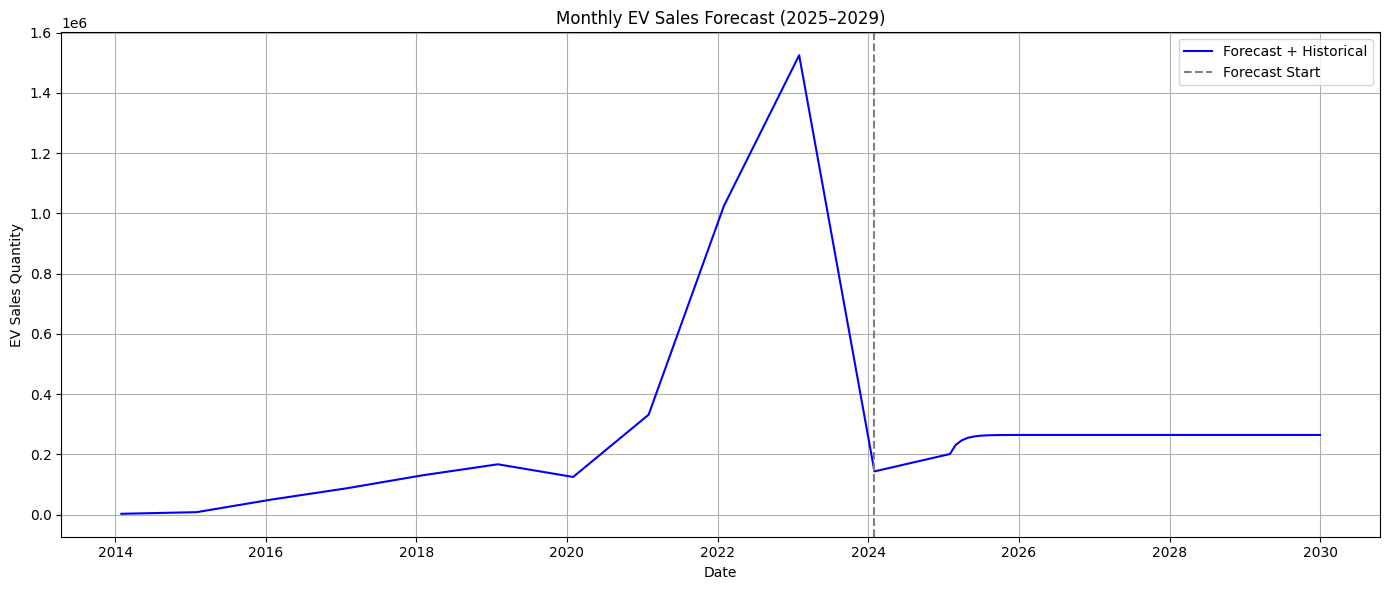

In [26]:
# Redefine forecast to start from Jan 2025 to Dec 2029 (5 years)
forecast_5y_arima.index = pd.date_range(start='2025-01-01', periods=60, freq='M')

# Update combined forecast with correct index
combined_forecast = pd.concat([monthly_sales_ts['EV_Sales_Quantity'], forecast_5y_arima])

# Plot the updated forecast
plt.figure(figsize=(14, 6))
plt.plot(combined_forecast, label='Forecast + Historical', color='blue')
plt.axvline(x=monthly_sales_ts.index[-1], color='gray', linestyle='--', label='Forecast Start')
plt.title('Monthly EV Sales Forecast (2025–2029)')
plt.xlabel('Date')
plt.ylabel('EV Sales Quantity')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-27-e9249acb69eb>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  state_pivot = state_pivot.resample('M').sum()


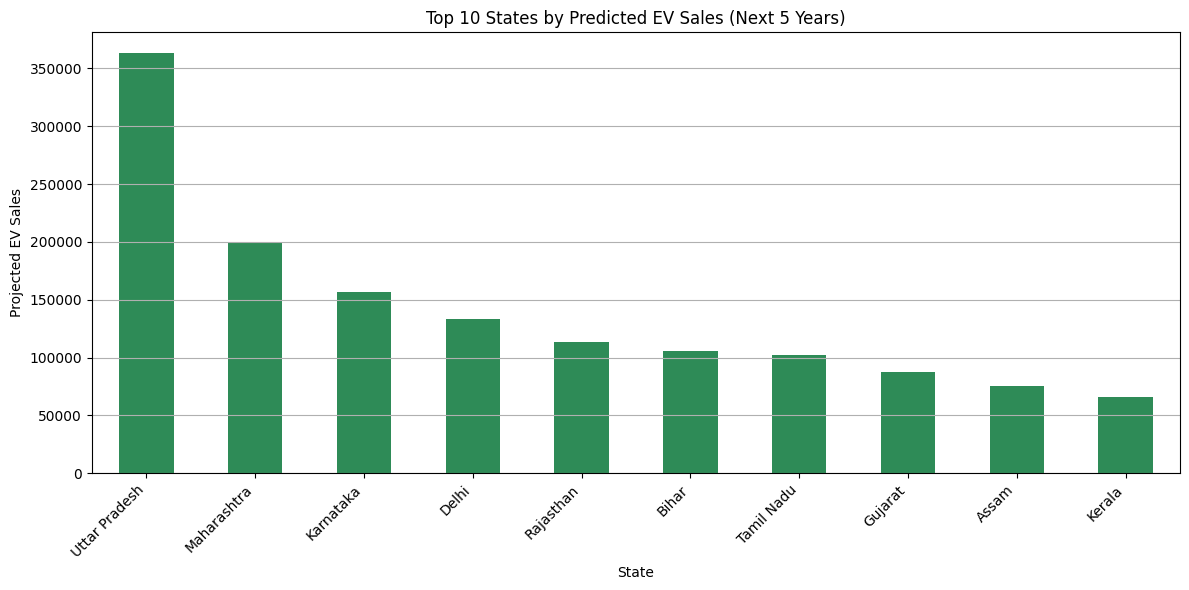

In [27]:
# Pivot to get states as columns
state_monthly = state_monthly_sales[state_monthly_sales['EV_Sales_Quantity'] > 0]
state_pivot = state_monthly.pivot(index='Date', columns='State', values='EV_Sales_Quantity')
state_pivot = state_pivot.resample('M').sum()

# Forecast: 5-year projection as avg monthly * 60
state_forecast_5y = state_pivot.mean() * 60
top10_states = state_forecast_5y.sort_values(ascending=False).head(10)

# Plot bar chart
plt.figure(figsize=(12, 6))
top10_states.plot(kind='bar', color='seagreen')
plt.title('Top 10 States by Predicted EV Sales (Next 5 Years)')
plt.xlabel('State')
plt.ylabel('Projected EV Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


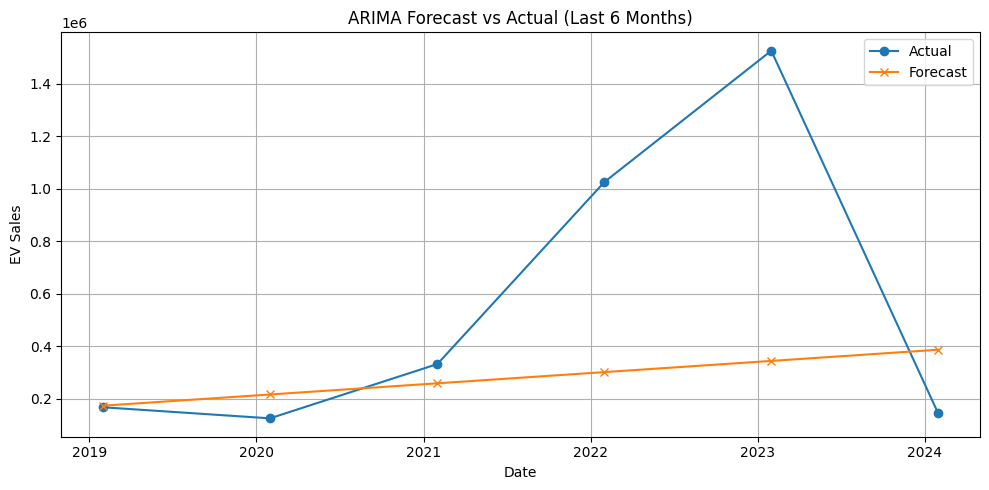

(386466.2553443759, np.float64(576368.5089814748))

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Use recent 6 months as test set
train_ts = monthly_sales_ts.iloc[:-6]
test_ts = monthly_sales_ts.iloc[-6:]

# Fit ARIMA on training data
arima_model_eval = ARIMA(train_ts['EV_Sales_Quantity'], order=(1, 1, 1))
arima_result_eval = arima_model_eval.fit()

# Forecast the next 6 months
forecast_eval = arima_result_eval.forecast(steps=6)

# Evaluation metrics
mae = mean_absolute_error(test_ts['EV_Sales_Quantity'], forecast_eval)
rmse = np.sqrt(mean_squared_error(test_ts['EV_Sales_Quantity'], forecast_eval))

# Plot actual vs predicted
plt.figure(figsize=(10, 5))
plt.plot(test_ts.index, test_ts['EV_Sales_Quantity'], label='Actual', marker='o')
plt.plot(test_ts.index, forecast_eval, label='Forecast', marker='x')
plt.title('ARIMA Forecast vs Actual (Last 6 Months)')
plt.xlabel('Date')
plt.ylabel('EV Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

(mae, rmse)


In [29]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor

# Reload & preprocess dataset (if needed)
df = pd.read_csv('Electric Vehicle Sales by State in India.csv')
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df[df['EV_Sales_Quantity'] > 0]
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Top 10 states from previous forecast
top10_states = ['Uttar Pradesh', 'Maharashtra', 'Karnataka', 'Delhi', 'Rajasthan',
                'Bihar', 'Tamil Nadu', 'Gujarat', 'Assam', 'Kerala']

df = df[df['State'].isin(top10_states)]

# Encode state
le = LabelEncoder()
df['State_encoded'] = le.fit_transform(df['State'])

# Train Random Forest
X = df[['Year', 'Month', 'State_encoded']]
y = df['EV_Sales_Quantity']
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Create prediction data: 2025–2029
future_dates = pd.date_range(start='2025-01-01', end='2029-12-31', freq='MS')
future_data = []

for state in top10_states:
    encoded = le.transform([state])[0]
    for date in future_dates:
        future_data.append({
            'Date': date,
            'Year': date.year,
            'Month': date.month,
            'State_encoded': encoded,
            'State': state
        })

future_df = pd.DataFrame(future_data)
future_df['Predicted_Sales'] = model.predict(future_df[['Year', 'Month', 'State_encoded']])


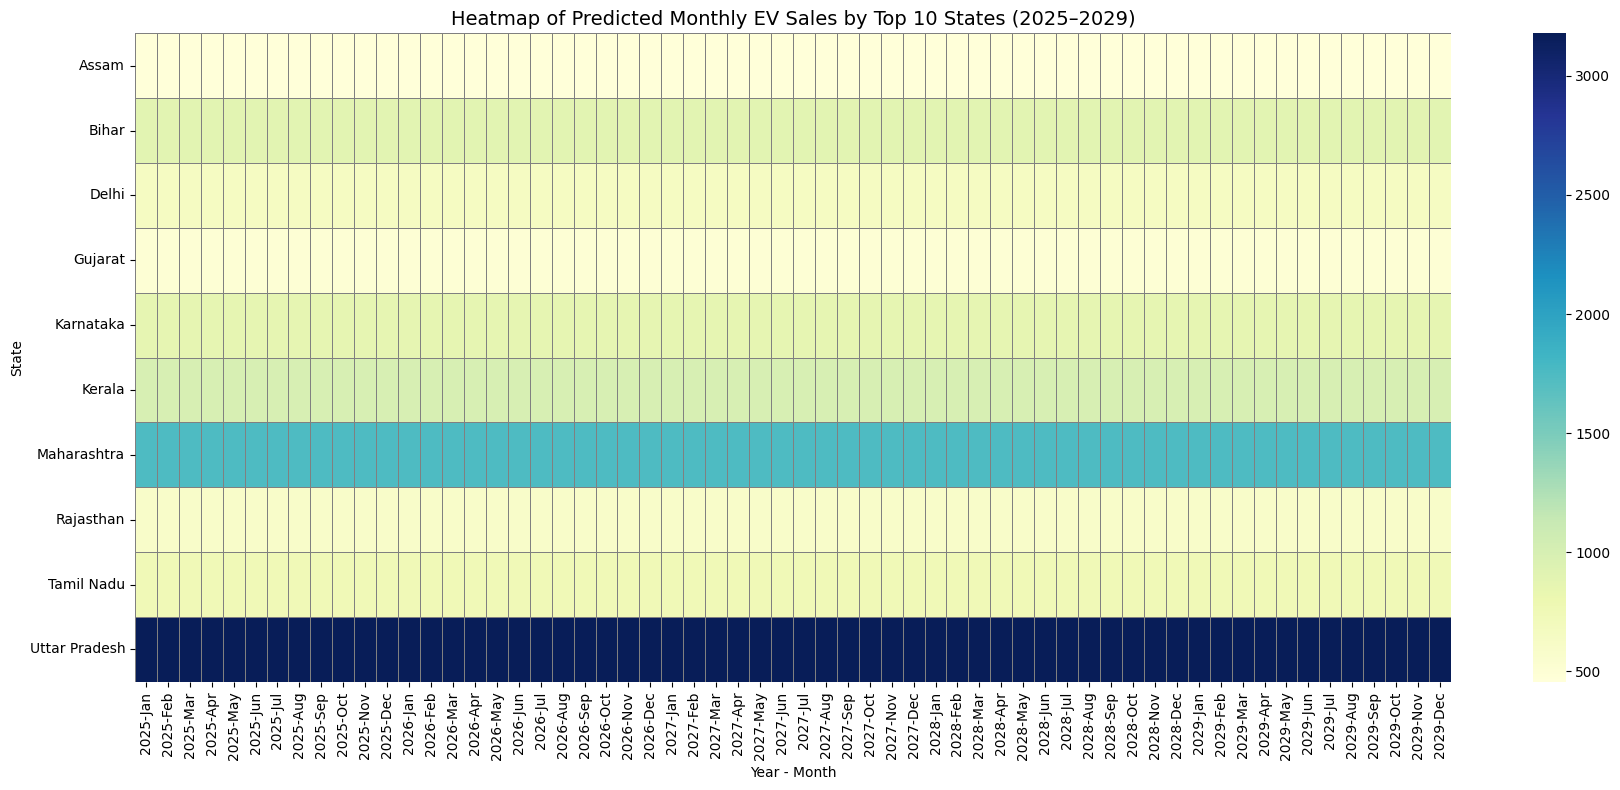

In [30]:
#  heatmap of predicted monthly EV sales for the Top 10 states (2025–2029)
#Brighter colors = higher sales

import seaborn as sns

# Summarize the predicted monthly sales (from Random Forest) into a pivot table for heatmap
heatmap_data = future_df.copy()
heatmap_data['Year'] = heatmap_data['Date'].dt.year
heatmap_data['Month'] = heatmap_data['Date'].dt.strftime('%b')

# Pivot to get states as rows and Year-Month as columns
heatmap_pivot = heatmap_data.pivot_table(
    index='State',
    columns=['Year', 'Month'],
    values='Predicted_Sales',
    aggfunc='sum'
)

# Sort months in calendar order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
heatmap_pivot = heatmap_pivot.reindex(columns=pd.MultiIndex.from_product(
    [sorted(heatmap_pivot.columns.levels[0]), month_order],
    names=['Year', 'Month']
), fill_value=0)

# Plot heatmap
plt.figure(figsize=(18, 8))
sns.heatmap(heatmap_pivot, cmap='YlGnBu', linewidths=0.5, linecolor='gray')
plt.title('Heatmap of Predicted Monthly EV Sales by Top 10 States (2025–2029)', fontsize=14)
plt.xlabel('Year - Month')
plt.ylabel('State')
plt.tight_layout()
plt.show()
